In [1]:
#https://aaronmcdaid.com/blog.posts/multiplot_from_generator/
def multiplot_from_generator(g, num_columns, figsize_for_one_row=None):
    # call 'next(g)' to get past the first 'yield'
    next(g)
    # default to 15-inch rows, with square subplots
    if figsize_for_one_row is None:
        figsize_for_one_row = (20, 10/num_columns)
    try:
        while True:
            # call plt.figure once per row
            plt.figure(figsize=figsize_for_one_row)
            for col in range(num_columns):
                ax = plt.subplot(1, num_columns, col+1)
                next(g)
    except StopIteration:
        pass

In [2]:
from IPython.core.display import HTML
HTML("<style> div.code_cell{width: 50%;float: left;}"
    +"div.text_cell{width: 50%;float: right;}"
    +"div.text_cell div.prompt {display: none;}</style>")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_csv('primary_dataset.csv')


In [4]:
X=data.iloc[:,3:15]
#https://365datascience.com/pca-k-means/
X

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


m

In [5]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
segmentation_std=scaler.transform(X)

In [6]:
from sklearn.decomposition import PCA


In [7]:
pca_baseline=PCA()
pca_baseline.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
len(pca_baseline.explained_variance_ratio_)

12

In [9]:
pca=PCA(n_components=3)

In [10]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
scores_pca=pca.transform(segmentation_std)

In [12]:
from sklearn.cluster import KMeans
def derivation_plot_and_yield():
    yield
    wcss=[]
    for i in range(2,10,1):
        kmeans_pca=KMeans(n_clusters=i,random_state=0)
        kmeans_pca.fit(scores_pca)
        wcss.append(kmeans_pca.inertia_)
    plt.bar(np.arange(2,10),wcss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('K-means on PCA Scores: K=6')
    yield
    plt.bar(np.arange(0,12),pca_baseline.explained_variance_ratio_.cumsum())
    plt.title('Why we Chose PCs=3')
    plt.xlabel('Number of Components')
    plt.ylabel('%Variance Explained')
    

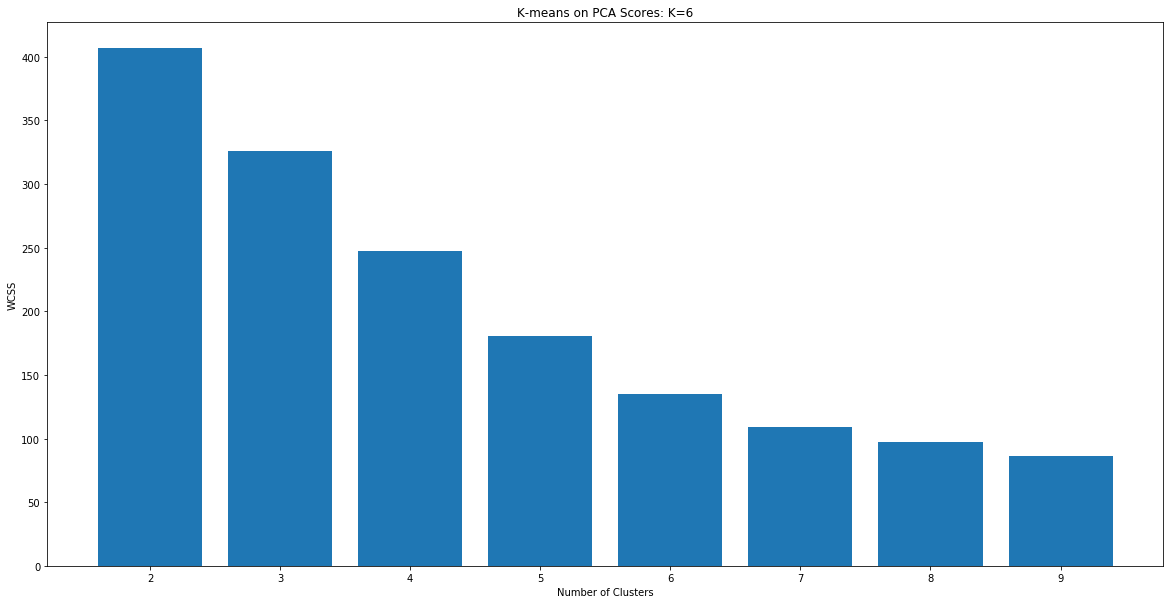

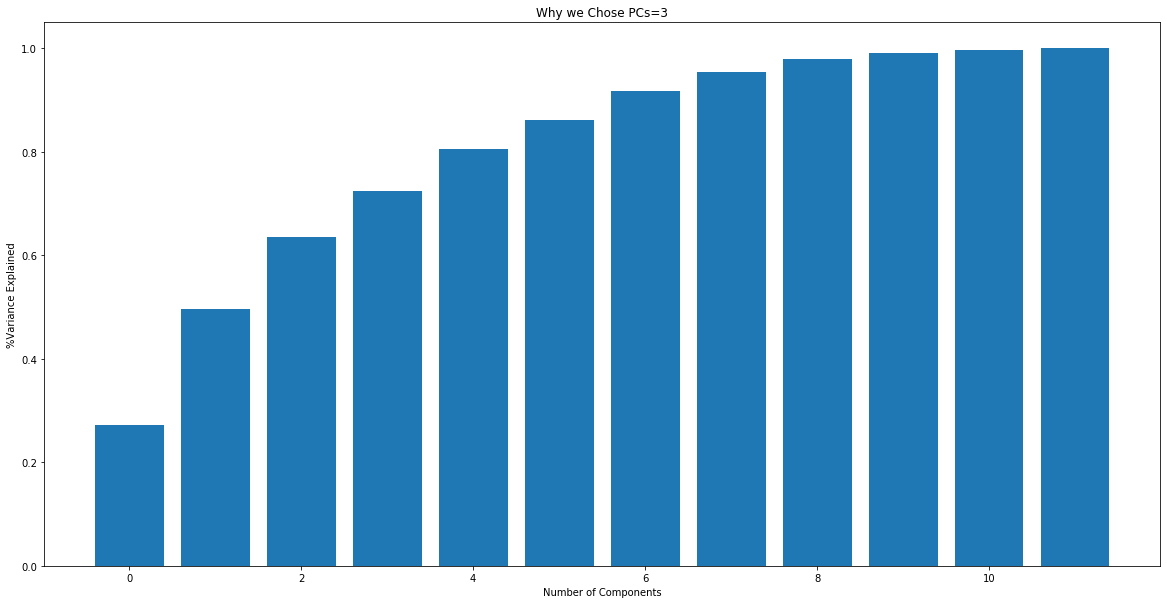

In [13]:
multiplot_from_generator(derivation_plot_and_yield(),1)

In [14]:
pd.DataFrame(pca.transform(segmentation_std))

,0,1,2
0,4.868203,2.747327,0.248272
1,1.725452,-0.151409,-3.206613
2,4.723380,2.195649,1.129336
3,5.182742,4.165207,2.248248
4,-0.498610,-0.671339,-0.891561
...,...,...,...
72,-1.040265,-0.546225,1.052044
73,-1.620682,-0.621014,-1.529449
74,-0.059120,0.620048,1.070227
75,-0.614436,0.598853,1.058642


In [15]:
from sklearn.cluster import KMeans
kmeans_pca=KMeans(n_clusters=6,random_state=0)

In [16]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [17]:
df_kmeans_pca=kmeans_pca.predict(scores_pca)

In [18]:
new_df=pd.concat([data,pd.DataFrame(df_kmeans_pca)],axis=1)
new_df=new_df.rename(columns = {0:'Ratings PCA K-Means Grade'})

In [19]:
new_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Ratings PCA K-Means Grade
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,4
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,3
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,4
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,4
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,2
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,0
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,2
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,2


In [20]:
new_df1=pd.concat([new_df,pd.DataFrame(scores_pca)],axis=1)
new_df1=new_df1.rename(columns = {0:'PCA 1',1:'PCA 2',2:'PCA 3'})
new_df1

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Ratings PCA K-Means Grade,PCA 1,PCA 2,PCA 3
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,4,4.868203,2.747327,0.248272
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,3,1.725452,-0.151409,-3.206613
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,4,4.723380,2.195649,1.129336
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,4,5.182742,4.165207,2.248248
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,0,-0.498610,-0.671339,-0.891561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,2,-1.040265,-0.546225,1.052044
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,0,-1.620682,-0.621014,-1.529449
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,2,-0.059120,0.620048,1.070227
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,2,-0.614436,0.598853,1.058642


In [21]:
def PCA_plot_and_yield():
    yield
    plt.scatter(new_df1['calories'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('calories/serving')
    plt.ylabel('rating')
    plt.title('rating versus calories/serving')
    yield
    plt.scatter(new_df1['cups'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('cups')
    plt.ylabel('rating')
    plt.title('rating versus cups/serving')
    yield
    plt.scatter(new_df1['weight'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('weight in grams')
    plt.ylabel('rating')
    plt.title('rating versus weight in (g)/serving ')
    yield 
    plt.scatter(new_df1['shelf'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('shelf')
    plt.ylabel('rating')
    plt.title('rating versus shelf')
    yield
    plt.scatter(new_df1['vitamins'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('vitamins %')
    plt.ylabel('rating')
    plt.title('rating versus vitamins % ')
    yield
    plt.scatter(new_df1['potass'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('potass (g)')
    plt.ylabel('rating')
    plt.title('rating versus K (g)')
    yield
    plt.scatter(new_df1['fat'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('fat (g)')
    plt.ylabel('rating')
    plt.title('rating versus fat (g)')
    yield
    plt.scatter(new_df1['carbo'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('carbo (g)')
    plt.ylabel('rating')
    plt.title('rating versus carbo (g)')
    yield
    plt.scatter(new_df1['fiber'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('fiber (g)')
    plt.ylabel('rating')
    plt.title('rating versus fiber (g)')
    yield
    plt.scatter(new_df1['sodium'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('sodium (mg)')
    plt.ylabel('rating')
    plt.title('rating versus sodium (mg) ')
    yield
    plt.scatter(new_df1['sugars'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('sugars (g)')
    plt.ylabel('rating')
    plt.title('rating versus sugars (g)')
    yield
    plt.scatter(new_df1['protein'],new_df1['rating'],c=new_df1['Ratings PCA K-Means Grade'],cmap='Paired')
    plt.xlabel('protein (grams)')
    plt.ylabel('rating')
    plt.title('rating versus protein')

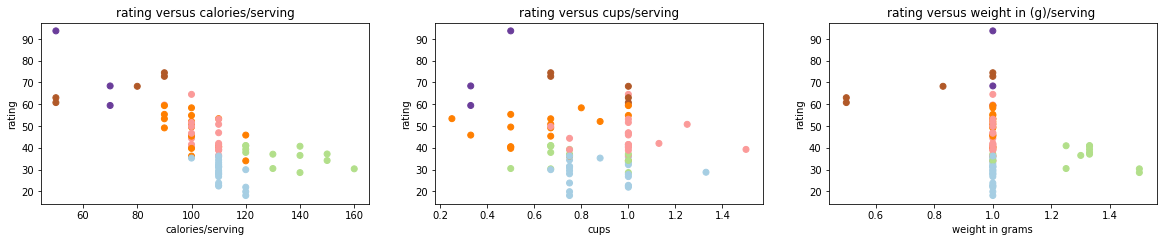

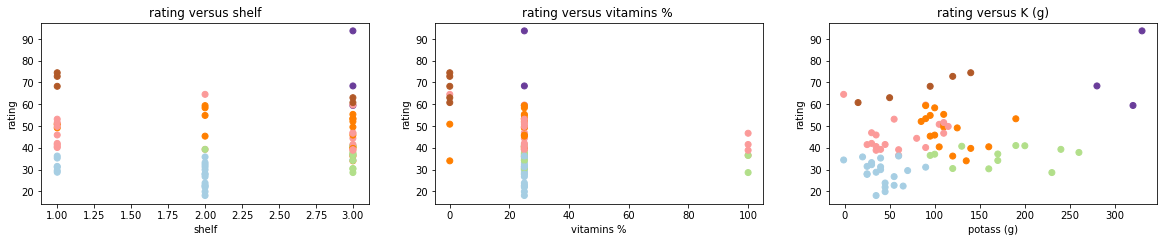

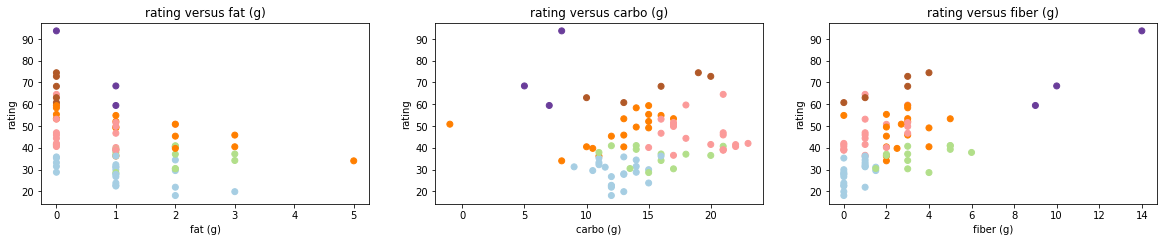

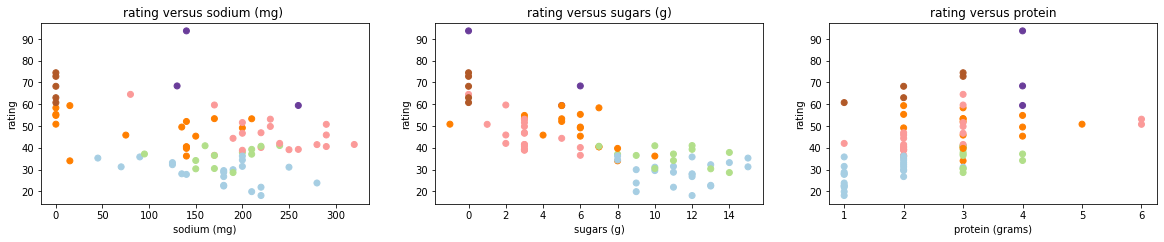

In [22]:
multiplot_from_generator(PCA_plot_and_yield(),3)

In [23]:
def intro_plot_and_yield():
    yield
    sns.boxplot(y=data['rating'],x=data['mfr']).set_title('Rating by Manufacturer Name')
    yield
    sns.boxplot(y=data['sodium'],x=data['mfr']).set_title('Sodium by Manufacturer Name')
    yield
    sns.boxplot(y=data['sugars'],x=data['mfr']).set_title('Sugars by Manufacturer Name')
    yield
    sns.boxplot(y=data['fiber'],x=data['mfr']).set_title('Fiber by Manufacturer Name')
    yield
    sns.boxplot(y=data['calories'],x=data['mfr']).set_title('calories by Manufacturer Name')
    yield
    sns.boxplot(y=data['fat'],x=data['mfr']).set_title('Fat by Manufacturer Name')
    yield
    sns.boxplot(y=data['carbo'],x=data['mfr']).set_title('Carbo by Manufacturer Name')
    yield
    sns.boxplot(y=data['potass'],x=data['mfr']).set_title('Potass by Manufacturer Name')
    yield
    sns.boxplot(y=data['protein'],x=data['mfr']).set_title('protein by Manufacturer Name')
    yield
    sns.boxplot(y=data['vitamins'],x=data['mfr']).set_title('vitamins % by manufacturer name')

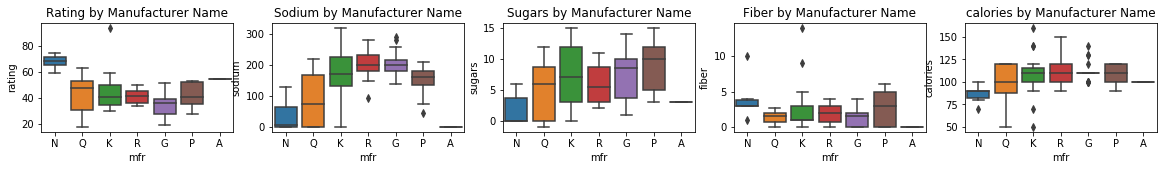

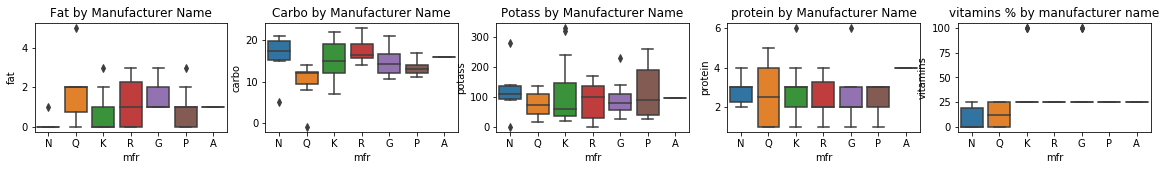

In [24]:
multiplot_from_generator(intro_plot_and_yield(), 5)


In [25]:
data[data['mfr']=='N'] # cluster one

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
68,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.00,1.00,59.363993


In [26]:
data[data['name']=='All-Bran with Extra Fiber'] # the best cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


In [27]:
data[(data['mfr']!= 'N') & (data['name']!='All-Bran with Extra Fiber') ] #cluster three

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [28]:
#https://stackoverflow.com/questions/39409866/correlation-heatmap
import seaborn as sns
def mfr_plot_and_yield():
    yield
    corr = data[(data['mfr']!='N') & (data['name']!='All-Bran with Extra Fiber')].corr()# cluster two
    sns.heatmap(corr.pow(2), 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap="Pastel1",square=True,cbar=True,fmt='d').set_title('Poorly Rated Cereals')
    yield
    corr = data[(data['mfr']=='N')].corr()# cluster two
    sns.heatmap(corr.pow(2), 
        xticklabels=corr.columns,
        yticklabels=corr.columns,cmap="PuOr",square=True,cbar=True,fmt='d').set_title('Highly Rated Cereals: Nabisco brand or All Bran with Extra Fiber')

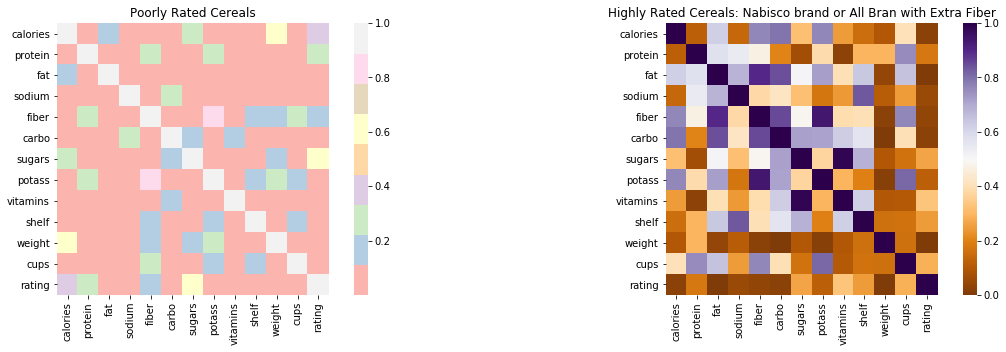

In [29]:
multiplot_from_generator(mfr_plot_and_yield(), 2)

In [30]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=0)
t=[None]
names=['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']

for i in range(3,12,1):
    if i!=4 and i!=5:
        kmeans=KMeans(n_clusters=3,random_state=0)
        kmeans.fit(data.iloc[:,i].values.reshape(-1,1))
        t.append(kmeans.predict(data.iloc[:,i].values.reshape(-1,1)))
    if i==4 or i==5:
        kmeans=KMeans(n_clusters=2,random_state=0)
        kmeans.fit(data.iloc[:,i].values.reshape(-1,1))
        t.append(kmeans.predict(data.iloc[:,i].values.reshape(-1,1)))
t=t[1::]
len(t)

9

In [31]:
from sklearn.cluster import KMeans
print('Initial K-Means Error Estimate at K=2')
print('')
A=[None]
for i in range(3,14,1):
    kmeans=KMeans(n_clusters=2,random_state=0)
    kmeans.fit(data.iloc[:,i].values.reshape(-1,1))
    A.append(kmeans.inertia_)
A[1::]

Initial K-Means Error Estimate at K=2



[14812.860576923076,
 31.98852901484481,
 25.010526315789466,
 158886.568627451,
 187.3266216216216,
 562.7375168690958,
 373.8285714285715,
 133953.86057692306,
 4436.6197183098575,
 10.243902439024392,
 0.5777186567164178]

In [32]:
from sklearn.cluster import KMeans
print('Finding optimal number of clusters for every variable individually until the error is 20 percent of the K=2 error')
print('')
for i in range(3,14,1):
    print(data.columns[i])
    for j in range(2,20,1):
        kmeans=KMeans(n_clusters=j,random_state=0)
        kmeans.fit(data.iloc[:,i].values.reshape(-1,1))
        #print(' The variable, ' + data.columns[i] +', has WSS ' + str(kmeans.inertia_) + ' with ' + str(j) + ' K-Means clusters')
        if (kmeans.inertia_/A[1::][i-3])<=0.2:
            print(str(j))
            break
    print('')

Finding optimal number of clusters for every variable individually until the error is 20 percent of the K=2 error

calories
4

protein
5

fat
4

sodium
5

fiber
4

carbo
5

sugars
5

potass
5

vitamins
3

shelf
3

weight
3



In [33]:
def super_kmeans():
    for i in range(9):
        yield
        plt.scatter(t[i],data.iloc[:,i+3].values.reshape(-1,1),s=50,cmap='viridis',c=t[i])
        plt.xlabel('K-means grade')
        plt.ylabel(names[i])

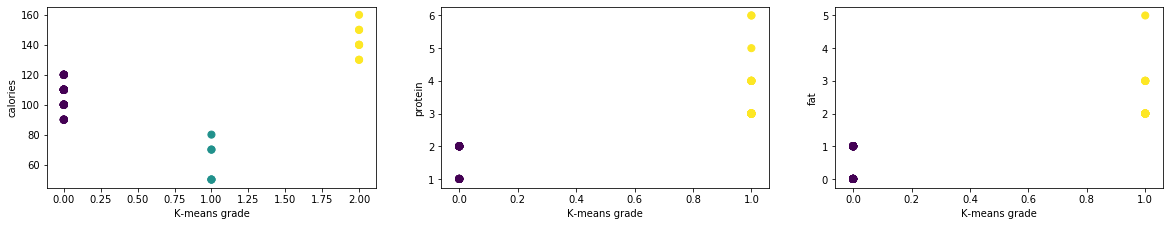

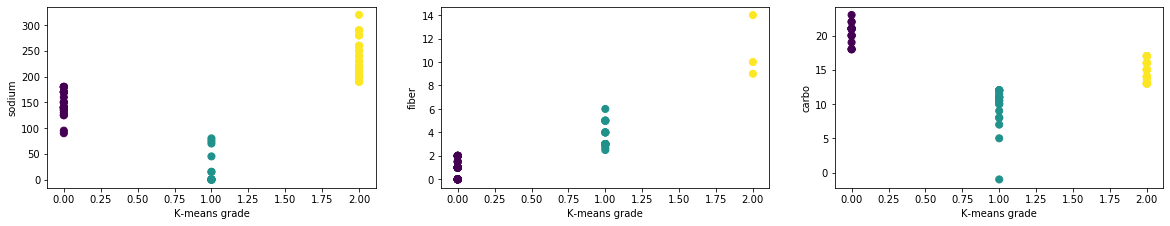

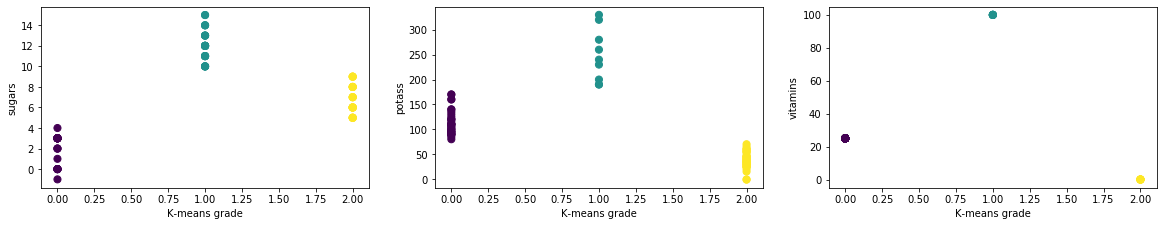

In [34]:
multiplot_from_generator(super_kmeans(), 3)

In [35]:
rec=data.drop(['shelf','weight','cups','type'],axis=1)

In [36]:
rec[(rec['calories']<=80 ) & (rec['protein']>=3) & (rec['fat']<=1) & (rec['fiber']>=8) & (rec['sugars']<=4)]

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
3,All-Bran with Extra Fiber,K,50,4,0,140,14.0,8.0,0,330,25,93.704912


In [37]:
rec[  (rec['sugars']<=4) ]

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
3,All-Bran with Extra Fiber,K,50,4,0,140,14.0,8.0,0,330,25,93.704912
11,Cheerios,G,110,6,2,290,2.0,17.0,1,105,25,50.764999
15,Corn Chex,R,110,2,0,280,0.0,22.0,3,25,25,41.445019
16,Corn Flakes,K,100,2,0,290,1.0,21.0,2,35,25,45.863324
20,Cream of Wheat (Quick),N,100,3,0,80,1.0,21.0,0,-1,0,64.533816
21,Crispix,K,110,2,0,220,1.0,21.0,3,30,25,46.895644
33,Grape-Nuts,P,110,3,0,170,3.0,17.0,3,90,25,53.371007
34,Great Grains Pecan,P,120,3,3,75,3.0,13.0,4,100,25,45.811716
40,Kix,G,110,2,1,260,0.0,21.0,3,40,25,39.241114
43,Maypo,A,100,4,1,0,0.0,16.0,3,95,25,54.850917


In [38]:
rec[  (rec['sugars']<=4) & (rec['sodium']<=100) ]

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
20,Cream of Wheat (Quick),N,100,3,0,80,1.0,21.0,0,-1,0,64.533816
34,Great Grains Pecan,P,120,3,3,75,3.0,13.0,4,100,25,45.811716
43,Maypo,A,100,4,1,0,0.0,16.0,3,95,25,54.850917
54,Puffed Rice,Q,50,1,0,0,0.0,13.0,0,15,0,60.756112
55,Puffed Wheat,Q,50,2,0,0,1.0,10.0,0,50,0,63.005645
57,Quaker Oatmeal,Q,100,5,2,0,2.7,-1.0,-1,110,0,50.828392
63,Shredded Wheat,N,80,2,0,0,3.0,16.0,0,95,0,68.235885
64,Shredded Wheat 'n'Bran,N,90,3,0,0,4.0,19.0,0,140,0,74.472949
65,Shredded Wheat spoon size,N,90,3,0,0,3.0,20.0,0,120,0,72.801787


Text(0.5, 0.98, 'K-Means Rating Score Versus Rating')

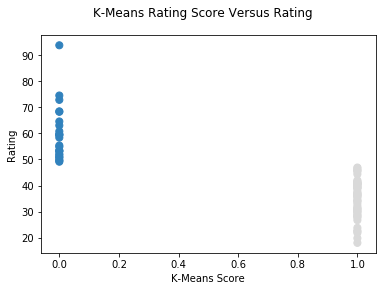

In [39]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0)
ratings=data.iloc[:,15].values# target selection
kmeans.fit(ratings.reshape(-1,1))
ratings_kmeans=kmeans.predict(ratings.reshape(-1,1))
#https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
plt.scatter(ratings_kmeans,ratings.reshape(-1,1),s=50,cmap='tab20c',c=ratings_kmeans)
plt.xlabel('K-Means Score')
plt.ylabel('Rating')
plt.suptitle('K-Means Rating Score Versus Rating')

In [40]:
ratings_dict={0:'Good', 1:'Bad'}
dictionary=pd.Series(ratings_dict)
subset=data.loc[:,'name':'rating']
K_rating=pd.DataFrame(dictionary[ratings_kmeans].reset_index().iloc[:,1])
my_df=pd.concat([subset,K_rating],axis=1)
my_df=my_df.rename(columns = {0:'Ratings K-Means Grade'}) # re-naming column
my_df[::-1]
#Citation: (Don't erase) https://stackoverflow.com/questions/27719407/pandas-concat-valueerror-shape-of-passed-values-is-blah-indices-imply-blah2
#it turns out there's more than 3 clusters
#the best cereal is the only A grade cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Ratings K-Means Grade
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559,Bad
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,Good
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Good
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,Bad
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Bad
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Good
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Good
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Bad


'rating'

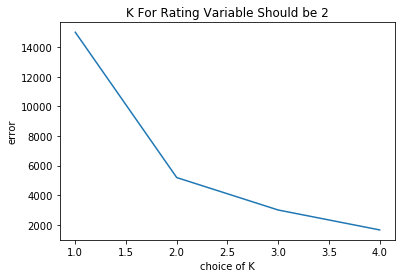

In [41]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,5):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data.iloc[:,15].values.reshape(-1,1))
    wcss.append(kmeans.inertia_)
plt.plot(np.arange(1,5),wcss)
plt.xlabel('choice of K')
plt.ylabel('error')
plt.title('K For Rating Variable Should be 2')
data.columns[15]

In [42]:
my_df.iloc[:,16].values

array(['Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good',
       'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad',
       'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad',
       'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad',
       'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad',
       'Bad', 'Bad', 'Good', 'Good', 'Bad'], dtype=object)

Accuracy: 0.9814814814814815


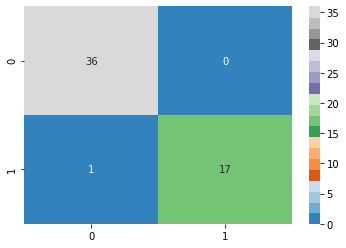

In [43]:
from sklearn.neighbors import KNeighborsClassifier
X=scores_pca
y=my_df.iloc[:,16].values
from sklearn.preprocessing import Normalizer
function=Normalizer().fit(X)
X_perp=function.transform(X)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_perp, y, random_state=0,
                                       train_size=0.3)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(Xtrain,ytrain)
Y_pred=knn.predict(Xtest)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest,Y_pred))
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest, Y_pred,labels=['Bad','Good'])
sns.heatmap(mat,annot=True,cmap='tab20c')

Text(0, 0.5, 'Error')

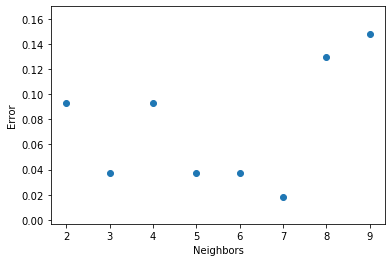

In [44]:
import seaborn as sns
error_rate = []
k=range(2,10)
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,ytrain)
    pred_i = knn.predict(Xtest)
    error_rate.append(np.mean(pred_i != ytest))
plt.scatter(x=k, y=error_rate)
plt.xlabel('Neighbors')
plt.ylabel('Error')

In [45]:
import seaborn as sns
def rating_predictors():
    yield
    X=data.iloc[:,3:13]
    y=my_df.iloc[:,16].values
    from sklearn.preprocessing import Normalizer
    function=Normalizer().fit(X)
    X_perp=function.transform(X)
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_perp, y, random_state=0,
                                              train_size=0.3)
    from sklearn.naive_bayes import GaussianNB
    estimator=GaussianNB()
    estimator.fit(Xtrain,ytrain)
    GSNBlabels=estimator.predict(Xtest)
    from sklearn import metrics
    print("Accuracy:",metrics.accuracy_score(ytest,GSNBlabels))
    mat=confusion_matrix(ytest, GSNBlabels,labels=['Bad','Good'])
    sns.heatmap(mat,annot=True,xticklabels=['Bad','Good'],yticklabels=['Bad','Good'],cmap='tab20c')
    
    yield
    from sklearn.neighbors import KNeighborsClassifier
    X=pd.DataFrame(pca.transform(segmentation_std))
    y=my_df.iloc[:,16].values
    from sklearn.preprocessing import Normalizer
    function=Normalizer().fit(X)
    X_perp=function.transform(X)
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_perp, y, random_state=0,
                                           train_size=0.3)
    knn=KNeighborsClassifier(n_neighbors=7)
    knn.fit(Xtrain,ytrain)
    Y_pred=knn.predict(Xtest)
    from sklearn import metrics
    print("Accuracy:",metrics.accuracy_score(ytest,Y_pred))
    mat=confusion_matrix(ytest, Y_pred,labels=['Bad','Good'])
    sns.heatmap(mat,annot=True,xticklabels=['Bad','Good'],yticklabels=['Bad','Good'],cmap='tab20c',)
    yield
    from sklearn.svm import SVC # "Support vector classifier"
    X=pd.DataFrame(pca.transform(segmentation_std))
    y=my_df.iloc[:,16].values
    from sklearn.preprocessing import Normalizer
    function=Normalizer().fit(X)
    X_perp=function.transform(X)
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_perp, y, random_state=0,
                                              train_size=0.3)
    clf = SVC(kernel='sigmoid',C=1e1) # sigmoid kernel
    clf.fit(Xtrain, ytrain)#can't us a continuous predicted variable
    clf.predict(Xtest)
    from sklearn.metrics import accuracy_score
    print("Accuracy: ", accuracy_score(ytest,clf.predict(Xtest)))   
    mat=confusion_matrix(ytest, clf.predict(Xtest),labels=['Bad','Good'])
    sns.heatmap(mat,annot=True,xticklabels=['Bad','Good'],yticklabels=['Bad','Good'],cmap='tab20c')
    yield
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression(random_state=0)
    classifier.fit(Xtrain,ytrain)
    y_pred=classifier.predict(Xtest)
    from sklearn.metrics import accuracy_score
    print("Accuracy: ", accuracy_score(ytest,classifier.predict(Xtest)))   
    mat=confusion_matrix(ytest, classifier.predict(Xtest),labels=['Bad','Good'])
    sns.heatmap(mat,annot=True,xticklabels=['Bad','Good'],yticklabels=['Bad','Good'],cmap='tab20c')
    yield
    error_rate = []
    k=range(2,10)
    for i in k:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(Xtrain,ytrain)
        pred_i = knn.predict(Xtest)
        error_rate.append(np.mean(pred_i != ytest))
    plt.scatter(x=k, y=error_rate)
    plt.xlabel('Neighbors')
    plt.ylabel('Error')
    plt.title('Neighbors should be 7')
    yield
    from sklearn.cluster import KMeans
    wcss=[]
    for i in range(1,5):
        kmeans=KMeans(n_clusters=i,random_state=0)
        kmeans.fit(data.iloc[:,15].values.reshape(-1,1))
        wcss.append(kmeans.inertia_)
    plt.plot(np.arange(1,5),wcss)
    plt.xlabel('choice of K')
    plt.ylabel('error')
    plt.title('K For Rating Variable Should be 2')
    yield
    from sklearn.cluster import KMeans
    kmeans=KMeans(n_clusters=2,random_state=0)
    ratings=data.iloc[:,15].values# target selection
    kmeans.fit(ratings.reshape(-1,1))
    ratings_kmeans=kmeans.predict(ratings.reshape(-1,1))
    #https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
    plt.scatter(ratings_kmeans,ratings.reshape(-1,1),s=50,cmap='tab20c',c=ratings_kmeans)
    plt.xlabel('K-Means Score')
    plt.ylabel('Rating')
    plt.title('K-Means Rating Score Versus Rating')

Accuracy: 0.8888888888888888
Accuracy: 0.9814814814814815
Accuracy:  0.9814814814814815
Accuracy:  0.9629629629629629


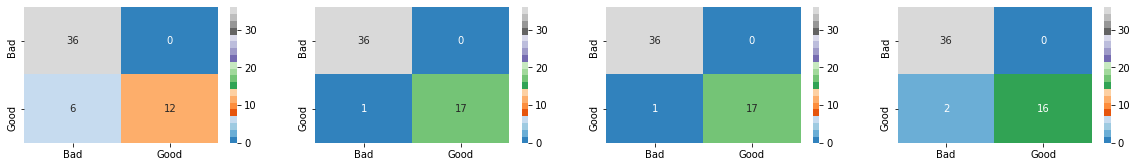

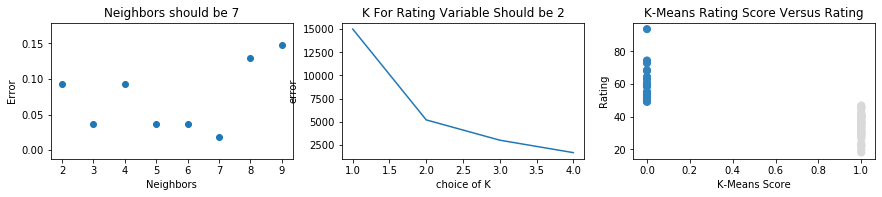

In [46]:
multiplot_from_generator(rating_predictors(), 4)

array([[ 4.86820312,  2.74732726,  0.24827216],
       [ 1.72545207, -0.15140902, -3.20661311],
       [ 4.7233803 ,  2.19564902,  1.12933604],
       [ 5.18274193,  4.16520702,  2.24824754],
       [-0.49860952, -0.67133931, -0.89156127],
       [-0.31526161, -0.27202105, -1.47589656],
       [-1.13020698, -0.26513708, -1.3289875 ],
       [ 1.05593652, -2.20917965,  0.31103728],
       [ 0.07868149,  0.85986632,  0.32400026],
       [ 1.61930273,  1.16902515,  1.1351128 ],
       [-0.89605336, -1.29107007, -1.80478387],
       [-0.1909091 , -0.04536626,  1.95506843],
       [-0.71121784, -1.25795759, -1.76353351],
       [ 1.25626095,  0.02005537, -0.70444428],
       [-1.35541646, -0.79623071, -1.518466  ],
       [-2.68877935, -0.354219  ,  1.60480581],
       [-2.39752791,  0.10635648,  1.79847952],
       [-1.64398094, -0.12787753, -1.30322982],
       [-1.2844136 , -0.78899351, -1.49783676],
       [ 2.44847323,  0.11695007, -1.13183697],
       [-1.90655331,  1.37397595,  0.931

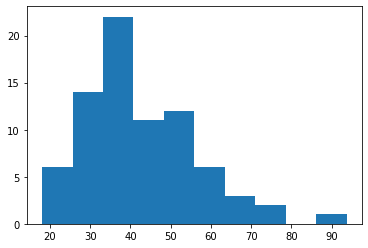

In [47]:
plt.hist(data.iloc[:,15])
X